Game engine Classification 
Data: GameEngines https://www.kaggle.com/datasets/igalbronshtein/game-engines?resource=download

IMPORT

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [18]:
df = pd.read_csv('engines.csv')
df


,name,facebook,facebook_likes,facebook_followers,twitter,youtube,youtube_subscribers,youtube_videos,tiktok,snapchat,...,g2_reviews,producthunt,capterra,capterra_stars,capterra_ratings_num,similarweb,similarweb_total_visits,similarweb_bounce_rate,similarweb_pages_visit,similarweb_avg_visit
0,Clickteam Fusion,https://www.facebook.com/clickteam,11K,11K,http://twitter.com/clickteam,https://www.youtube.com/@ClickteamLLC,56.6K,372,x,x,...,x,x,https://www.capterra.com/p/250587/Clickteam-Fu...,x,x,https://www.similarweb.com/website/clickteam.c...,102.8K,46.70,3.24,00:02:05
1,Construct 3,https://www.facebook.com/ConstructTeam,23K,23K,https://twitter.com/ConstructTeam,https://www.youtube.com/c/Construct,15.5K,293,x,x,...,22,x,https://www.capterra.com/p/201543/Construct-3,4.7,208,https://www.similarweb.com/website/construct.n...,910.7K,43.18,6.43,00:11:41
2,CryEngine,https://www.facebook.com/cryengineofficial,43K,43K,https://twitter.com/cryengine,https://www.youtube.com/cryengine,50.1K,355,x,x,...,16,x,https://www.capterra.com/p/210664/CRYENGINE,4.8,6,https://www.similarweb.com/website/cryengine.c...,115.2K,54.23,2.60,00:01:45
3,Game Maker,https://www.facebook.com/GameMakerEngine,255K,256K,https://twitter.com/GameMakerEngine,https://www.youtube.com/@GameMakerEngine,62.6K,155,x,x,...,32,x,https://www.capterra.com/p/158594/GameMaker-St...,4.4,91,https://www.similarweb.com/website/gamemaker.i...,1.3M,45.51,3.66,00:04:43
4,GameSalad,https://www.facebook.com/gamesalad,7.1K,7K,https://twitter.com/gamesalad,https://www.youtube.com/@gamesalad,8.69K,70,x,x,...,15,x,https://www.capterra.com/p/158595/GameSalad,4.1,23,https://www.similarweb.com/website/gamesalad.c...,111.7K,52.96,6.21,00:06:19
5,Gdevelop,https://www.facebook.com/GDevelopApp,3.2K,4.4K,https://twitter.com/GDevelopApp,https://www.youtube.com/@GDevelopApp,21.8K,118,https://www.tiktok.com/@gdevelop,x,...,18,https://www.producthunt.com/products/gdevelop,https://www.capterra.com/p/158592/GDevelop,4.8,8,https://www.similarweb.com/website/gdevelop.io...,507.7K,38.53,6.18,00:07:08
6,Godot,https://www.facebook.com/godotdevelopers,7.5K,8.6K,https://twitter.com/godotengine,https://www.youtube.com/@GodotEngineOfficial,54.5K,88,x,x,...,19,https://www.producthunt.com/products/godot#godot,https://www.capterra.com/p/234843/Godot-Engine,4.5,12,https://www.similarweb.com/website/godotengine...,1.8M,43.32,3.85,00:05:39
7,Open 3D Engine,https://www.facebook.com/Open3DEngine,79,92,https://twitter.com/o3dengine,https://www.youtube.com/channel/UCTC8GDw1XidOT...,3.84K,154,x,x,...,x,x,x,x,x,https://www.similarweb.com/website/o3de.org/#o...,52.4K,45.90,4.11,00:04:50
8,PlayCanvas,https://www.facebook.com/playcanvas,1.4K,1.5K,https://twitter.com/playcanvas,https://www.youtube.com/@playcanvas,2.98K,52,x,x,...,6,https://www.producthunt.com/products/playcanvas,https://www.capterra.com/p/210379/PlayCanvas,x,x,https://www.similarweb.com/website/playcanvas....,315.3K,36.48,7.24,00:11:55
9,Stencyl,https://www.facebook.com/stencyl,8.1K,8.1K,https://twitter.com/Stencyl,x,x,x,x,x,...,12,https://www.producthunt.com/products/stencyl,https://www.capterra.com/p/158598/Stencyl,4.5,11,https://www.similarweb.com/website/stencyl.com...,55.8K,44.16,1.98,00:04:43


DataExploration

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       12 non-null     object 
 1   facebook                   12 non-null     object 
 2   facebook_likes             12 non-null     object 
 3   facebook_followers         12 non-null     object 
 4   twitter                    12 non-null     object 
 5   youtube                    12 non-null     object 
 6   youtube_subscribers        12 non-null     object 
 7   youtube_videos             12 non-null     object 
 8   tiktok                     12 non-null     object 
 9   snapchat                   12 non-null     object 
 10  linkedin                   12 non-null     object 
 11  wikipedia                  12 non-null     object 
 12  wikipedia_languages_num    12 non-null     int64  
 13  site                       12 non-null     object 
 

In [20]:
df.describe()

,wikipedia_languages_num,alternativeto_likes,similarweb_bounce_rate,similarweb_pages_visit
count,12.000000,12.000000,12.000000,12.000000
mean,18.250000,119.750000,44.224167,4.844167
std,18.708894,139.313985,5.390457,1.865395
min,2.000000,10.000000,36.480000,1.980000
25%,4.000000,33.750000,40.020000,3.555000
50%,7.000000,64.000000,43.740000,4.570000
75%,28.750000,158.000000,46.100000,6.265000
max,53.000000,449.000000,54.230000,7.600000


In [12]:
numeric_columns = df.describe().columns.to_list()

In [21]:
df.describe(include=[object])

,name,facebook,facebook_likes,facebook_followers,twitter,youtube,youtube_subscribers,youtube_videos,tiktok,snapchat,...,g2,g2_stars,g2_reviews,producthunt,capterra,capterra_stars,capterra_ratings_num,similarweb,similarweb_total_visits,similarweb_avg_visit
count,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
unique,12,12,12,12,12,12,12,12,2,1,...,11,7,11,7,12,7,10,12,12,11
top,Clickteam Fusion,https://www.facebook.com/clickteam,11K,11K,http://twitter.com/clickteam,https://www.youtube.com/@ClickteamLLC,56.6K,372,x,x,...,x,4.5,x,x,https://www.capterra.com/p/250587/Clickteam-Fu...,x,x,https://www.similarweb.com/website/clickteam.c...,102.8K,00:04:43
freq,1,1,1,1,1,1,1,1,11,12,...,2,4,2,6,1,3,3,1,1,2


In [22]:
for col in [col for col in df if df[col].isna().sum() > (0.2 * df.shape[0])]:
    print(f"{col} - Missing values: {(df[col].isna().sum() / df.shape[0]):.2f} %")

In [23]:
categorical_columns = []
binary_columns = []

Separate the columns by type - numerical and categorical.

In [28]:
for column in df:
    column_type = df[column].dtype
    unique_values = df[column].unique()
    count_unique_values = len(unique_values)

    if count_unique_values < 10:
        if count_unique_values == 2:
            binary_columns.append(column)
        else:
            categorical_columns.append(column)
        print(f'{column:20} | {column_type} | {count_unique_values:5} | {unique_values}')

tiktok               | object |     2 | ['x' 'https://www.tiktok.com/@gdevelop']
snapchat             | object |     1 | ['x']
github               | object |     9 | ['x' 'https://github.com/Scirra' 'https://github.com/CRYTEK'
 'https://github.com/GDevelopApp' 'https://github.com/godotengine'
 'https://github.com/o3de' 'https://github.com/playcanvas'
 'https://github.com/Unity-Technologies' 'https://github.com/EpicGames']
github_followers     | object |     9 | ['x' '6' '233' '46' '3k' '223' '239' '6k' '18.7k']
alternativeto_stars  | object |     7 | ['5' '4.9' 'x' '4.5' '4.8' '2' '3.8']
alternativeto_ratings_num | object |     7 | ['1' '29' '2' 'x' '12' '33' '8']
g2_stars             | object |     7 | ['x' '4' '3.7' '4.1' '4.4' '4.5' '4.6']
producthunt          | object |     7 | ['x' 'https://www.producthunt.com/products/gdevelop'
 'https://www.producthunt.com/products/godot#godot'
 'https://www.producthunt.com/products/playcanvas'
 'https://www.producthunt.com/products/stencyl'
 '

In [29]:

# remove categorical columns from numeric
for column in categorical_columns:
    if column in numeric_columns:
        numeric_columns.remove(column)

# remove binary columns from numeric
for column in binary_columns:
    if column in numeric_columns:
        numeric_columns.remove(column)



In [30]:
# remove columns with a single unique value from categorical
categorical_columns.remove('snapchat')

In [31]:


for col in [col for col in df if df[col].unique().shape[0] > (0.2 * df.shape[0])]:
    print(f"{col} - Unique values: {(df[col].unique().shape[0] / df.shape[0]):.2f} %")



name - Unique values: 1.00 %
facebook - Unique values: 1.00 %
facebook_likes - Unique values: 1.00 %
facebook_followers - Unique values: 1.00 %
twitter - Unique values: 1.00 %
youtube - Unique values: 1.00 %
youtube_subscribers - Unique values: 1.00 %
youtube_videos - Unique values: 1.00 %
linkedin - Unique values: 1.00 %
wikipedia - Unique values: 1.00 %
wikipedia_languages_num - Unique values: 0.83 %
site - Unique values: 1.00 %
github - Unique values: 0.75 %
github_followers - Unique values: 0.75 %
alternativeto - Unique values: 1.00 %
alternativeto_likes - Unique values: 0.92 %
alternativeto_stars - Unique values: 0.58 %
alternativeto_ratings_num - Unique values: 0.58 %
g2 - Unique values: 0.92 %
g2_stars - Unique values: 0.58 %
g2_reviews - Unique values: 0.92 %
producthunt - Unique values: 0.58 %
capterra - Unique values: 1.00 %
capterra_stars - Unique values: 0.58 %
capterra_ratings_num - Unique values: 0.83 %
similarweb - Unique values: 1.00 %
similarweb_total_visits - Unique v

Plots

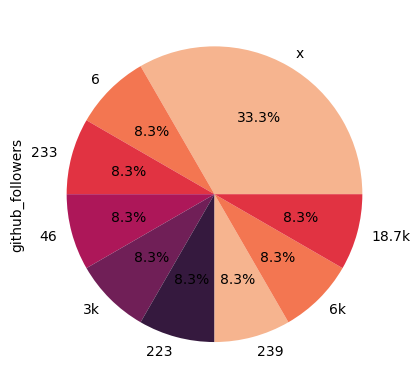

In [35]:
sns.set_palette('rocket_r')
df['github_followers'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

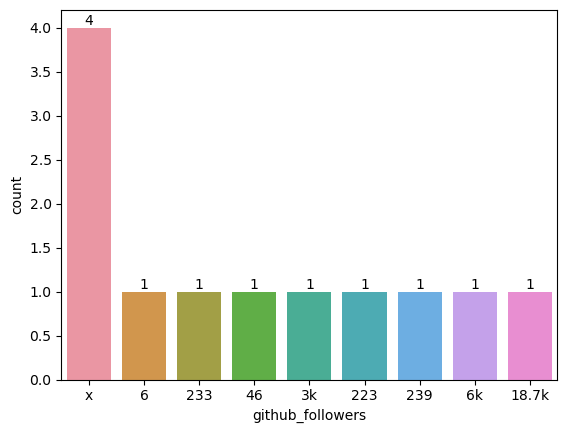

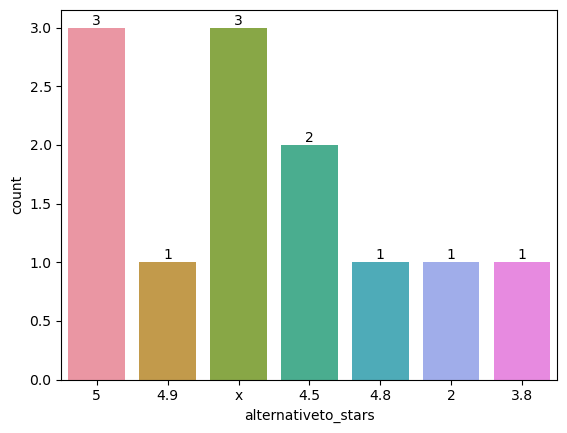

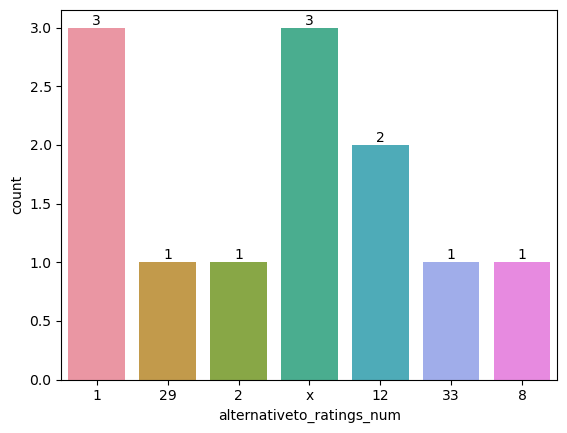

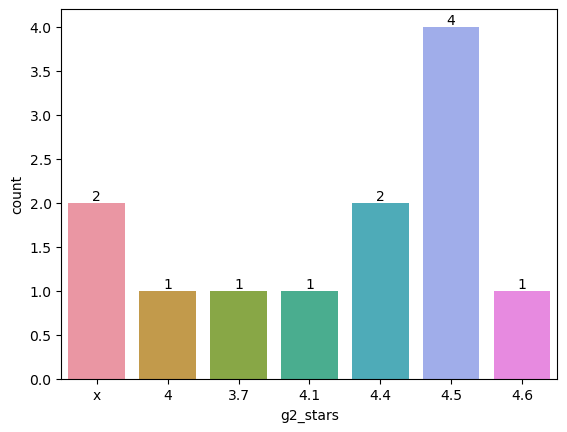

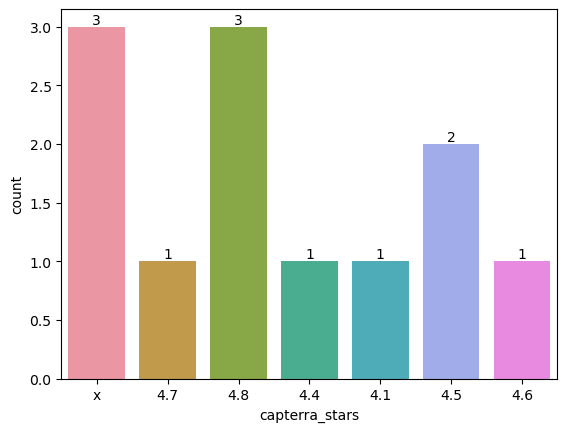

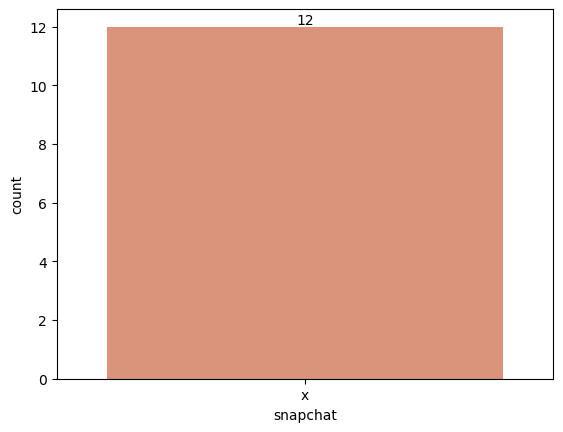

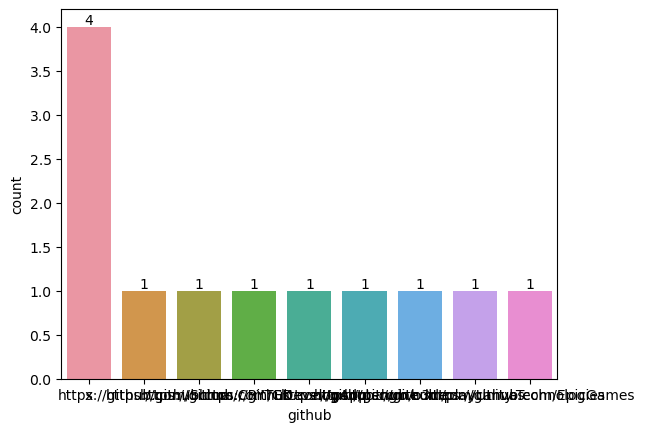

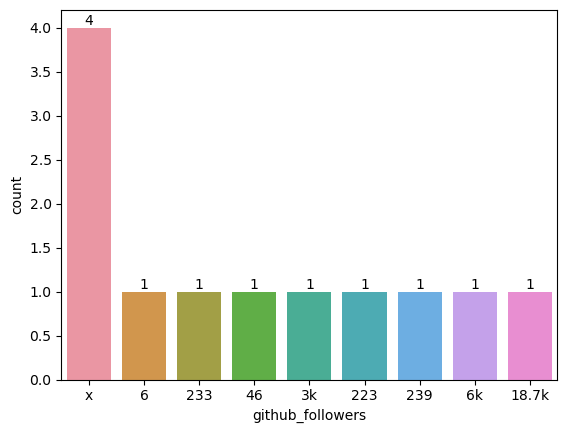

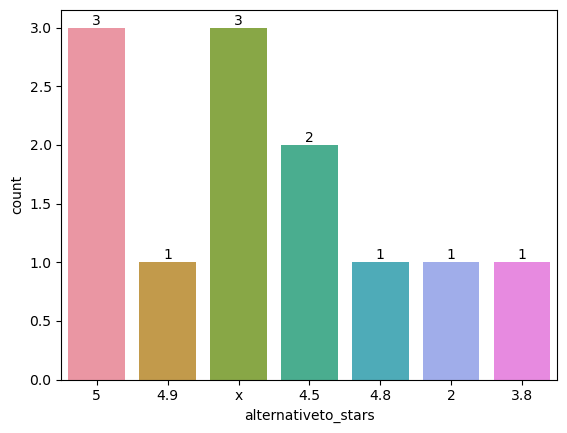

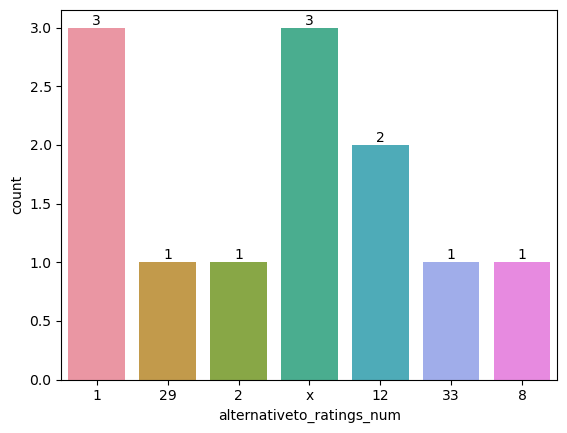

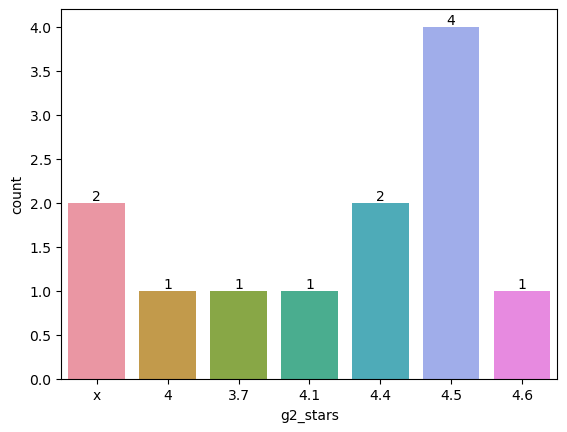

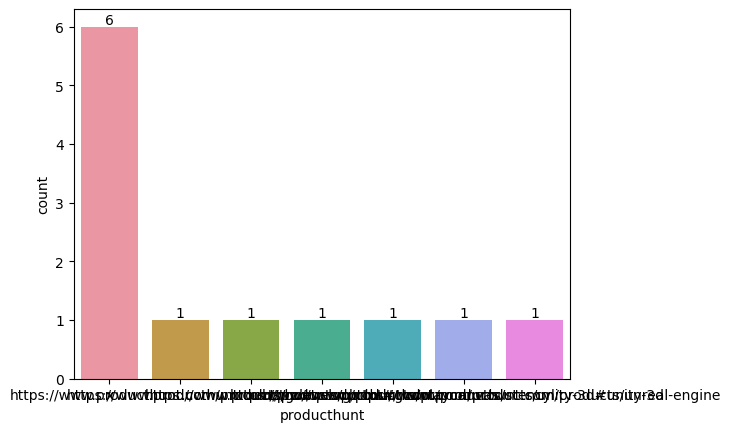

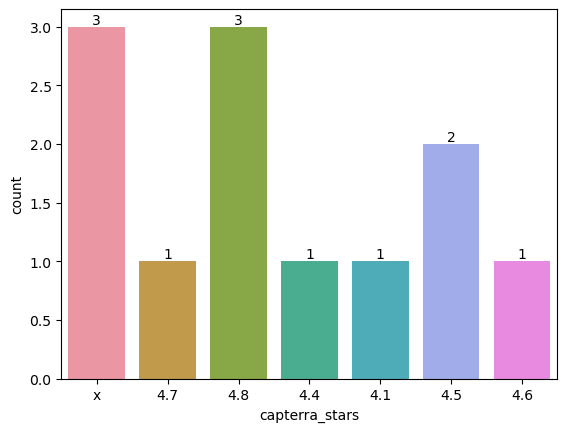

In [36]:
for column in categorical_columns:
    sns.set_palette('flare')
    p = sns.countplot(data=df, x=column)
    p.bar_label(p.containers[0])
    plt.show()

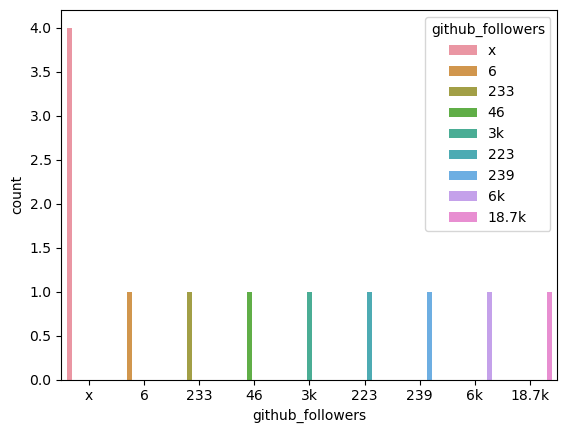

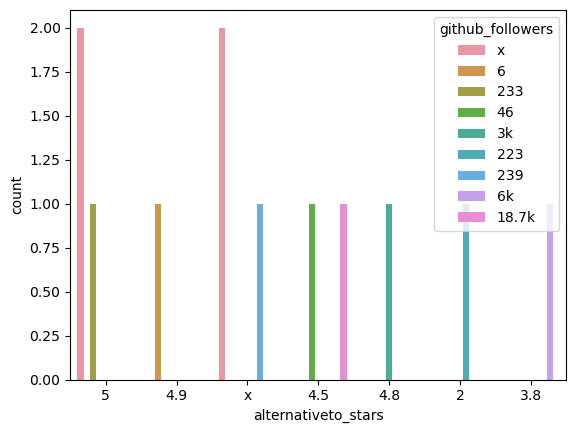

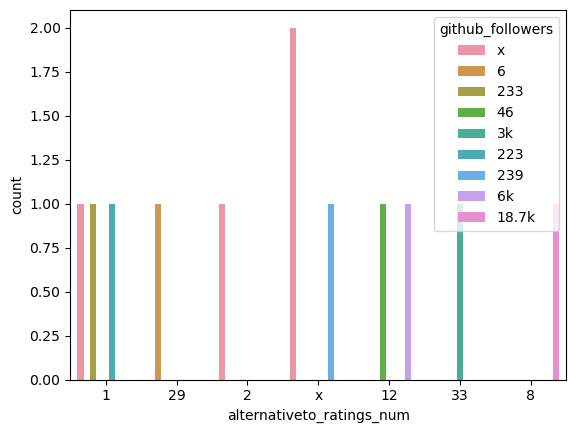

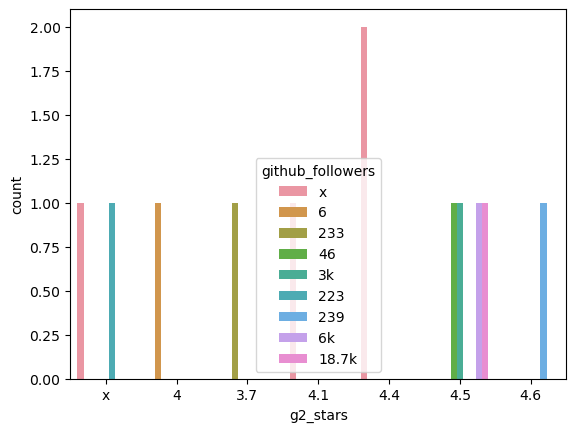

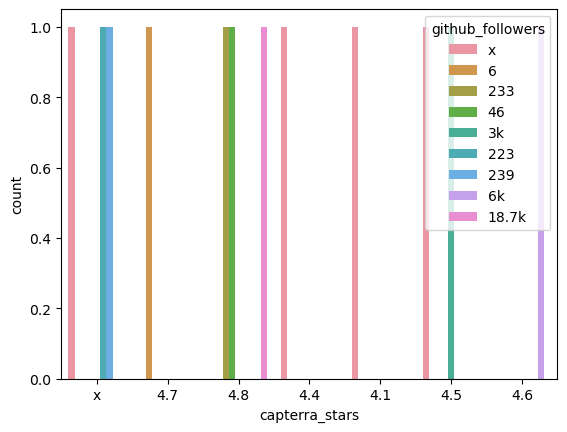

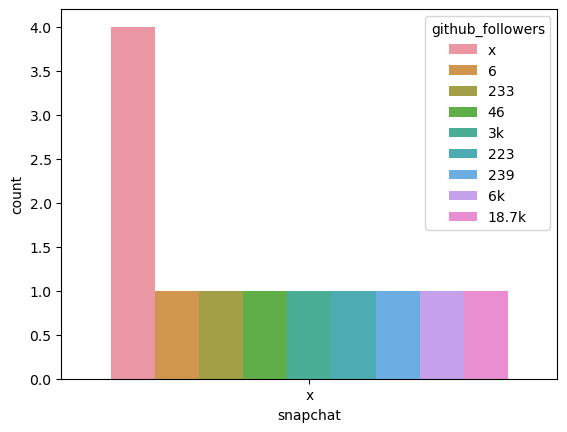

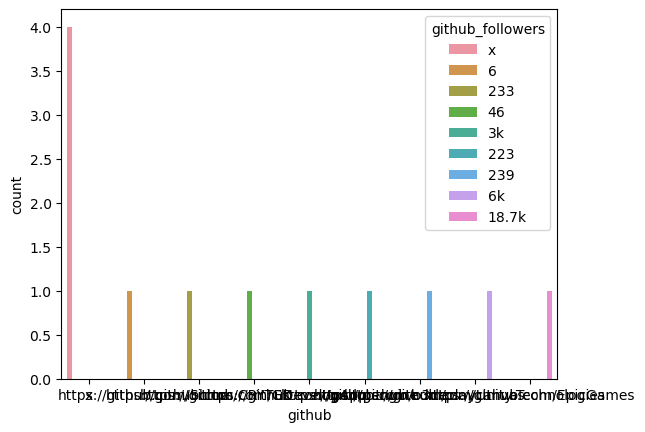

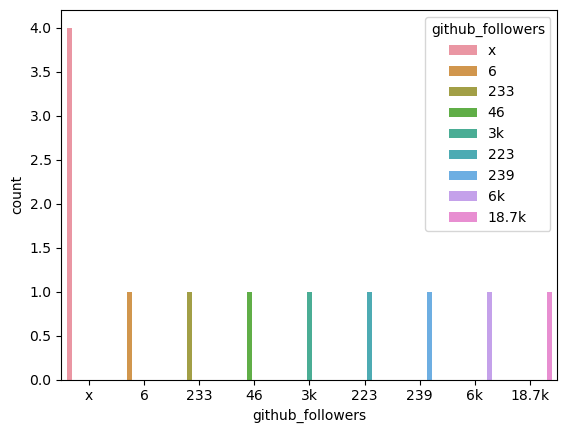

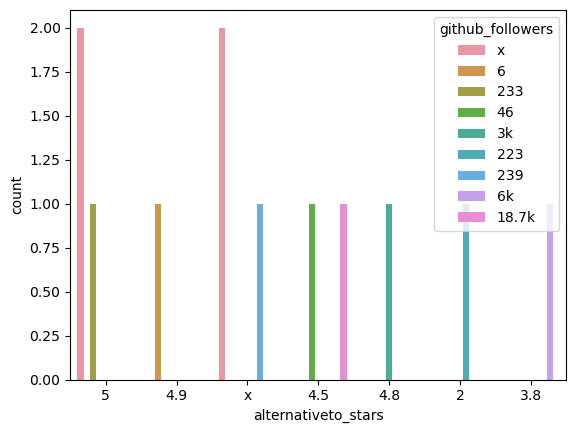

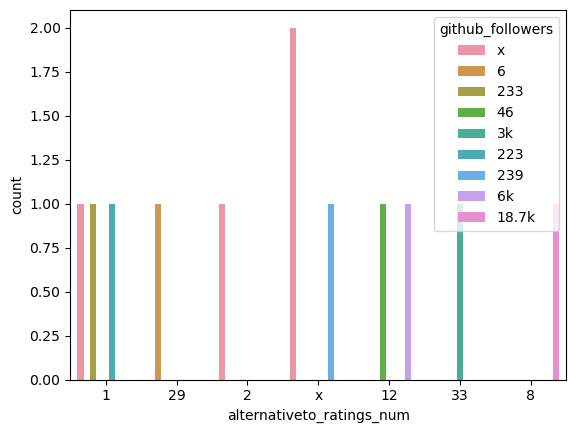

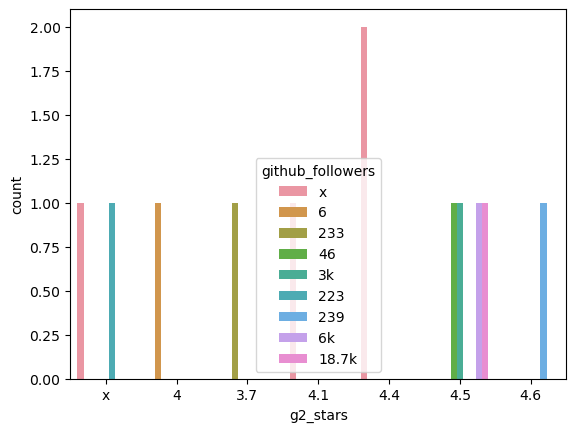

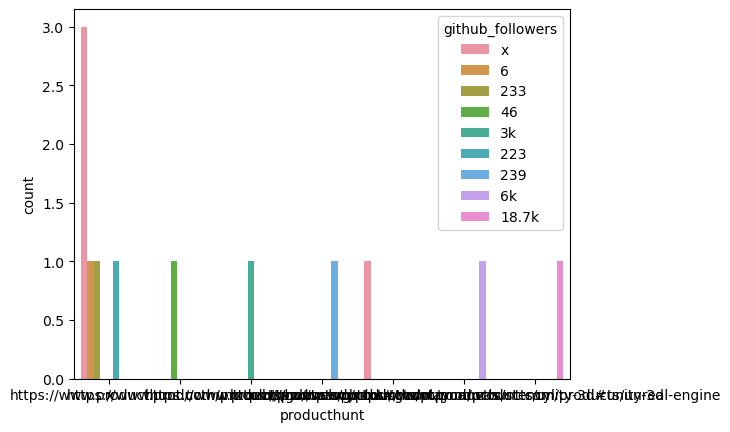

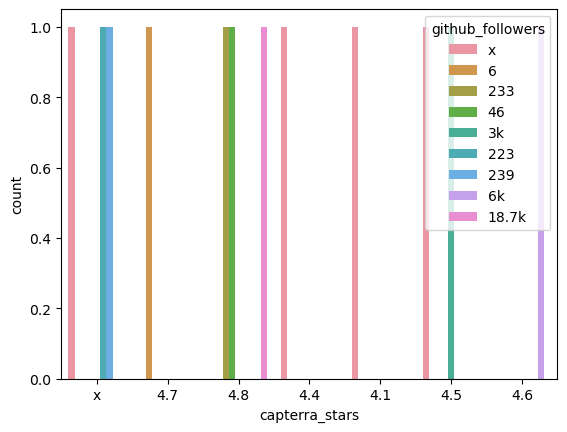

In [37]:
for column in categorical_columns:
    sns.set_palette('flare')
    p = sns.countplot(data=df, x=column, hue='github_followers')
    plt.show()

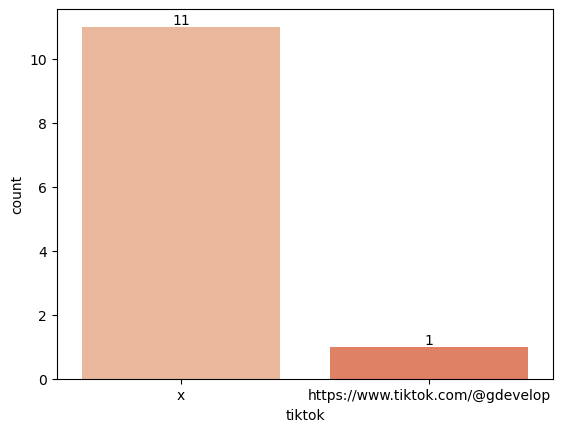

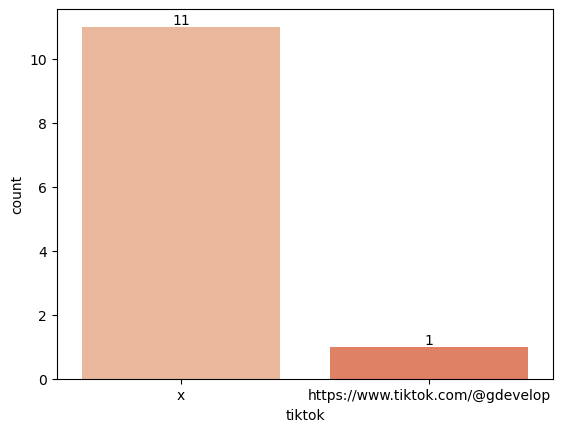

In [38]:


for column in binary_columns:
    sns.set_palette('rocket_r')
    p = sns.countplot(data=df, x=column)
    p.bar_label(p.containers[0])
    plt.show()

